<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/ANN_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)= cifar100.load_data()

hinh : [74]


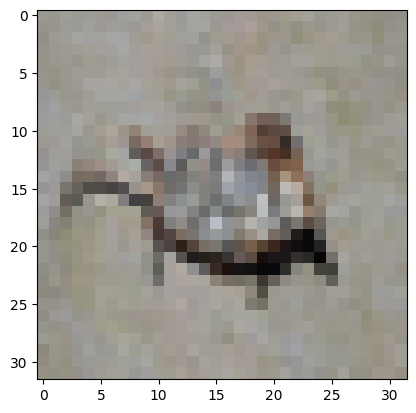

In [9]:
x_train.shape
x_test.shape
y_test.shape
import matplotlib.pyplot as plt
hinh= x_train[20]   
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("hinh :",y_train[20])

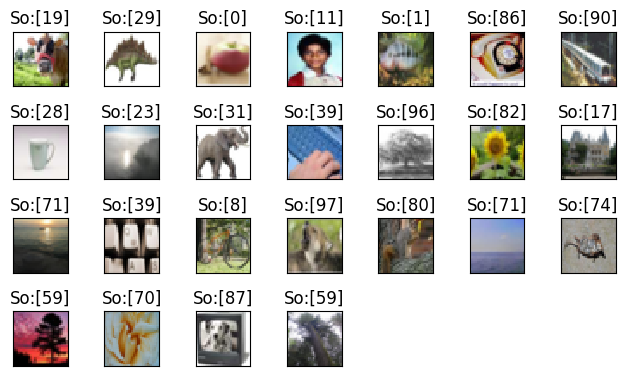

In [10]:
for i in range(25):
  plt.subplot(5,7,i+1) 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [11]:
from keras.models import Sequential      
from keras.layers import Dense      

model = Sequential()
model.add(Dense(4096, activation= 'relu',input_shape= (32*32*3,) )) 
model.add(Dense(2048, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4096)              12587008  
                                                                 
 dense_5 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 100)               51300     
                                                                 
Total params: 22,078,052
Trainable params: 22,078,052
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_train = x_train.reshape((50000,32*32*3,))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3,))
x_test = x_test.astype('float32')/255

In [13]:
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)




In [14]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs= 30, batch_size= 30000)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do mat mat:', test_loss)
print('Do chinh xac:', test_acc)

Epoch 1/30
2/2 [==============================] - 96s 36s/step - loss: 5.0808 - accuracy: 0.0102
Epoch 2/30
2/2 [==============================] - 86s 35s/step - loss: 9.9138 - accuracy: 0.0101
Epoch 3/30
2/2 [==============================] - 86s 34s/step - loss: 5.0872 - accuracy: 0.0108
Epoch 4/30
2/2 [==============================] - 85s 34s/step - loss: 4.6013 - accuracy: 0.0132
Epoch 5/30
2/2 [==============================] - 86s 34s/step - loss: 4.5756 - accuracy: 0.0161
Epoch 6/30
2/2 [==============================] - 87s 34s/step - loss: 4.5587 - accuracy: 0.0180
Epoch 7/30
2/2 [==============================] - 86s 33s/step - loss: 4.6241 - accuracy: 0.0138
Epoch 8/30
2/2 [==============================] - 87s 34s/step - loss: 4.5741 - accuracy: 0.0220
Epoch 9/30
2/2 [==============================] - 86s 34s/step - loss: 4.5716 - accuracy: 0.0219
Epoch 10/30
2/2 [==============================] - 85s 34s/step - loss: 4.5618 - accuracy: 0.0186
Epoch 11/30
2/2 [============

In [15]:
from keras.saving.saving_api import load_model
model.save('cifar100.h5')
model100 = load_model('cifar100.h5')

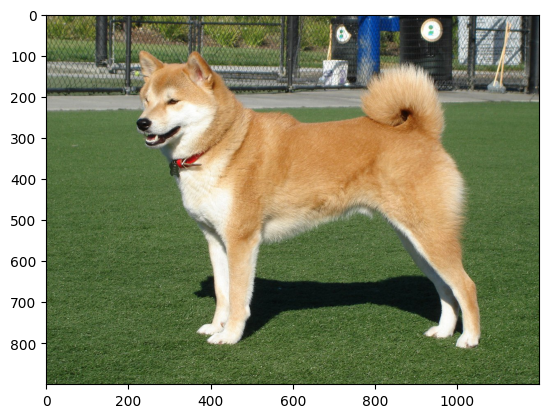

In [16]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image

img = Image.open('/content/Taka_Shiba.jpg')
imshow(img)

In [18]:
img = load_img('/content/Taka_Shiba.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 85ms/step


array([84])